# Setting up the environment

In [21]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score,fbeta_score, precision_score, recall_score, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance


In [50]:
#conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/minz/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37hf985489_0         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.5.0-py_0

The following packages will be UPDATED:

  conda                                4.8.5-py37h2987424_2 --> 4.9.2-py37

In [73]:
#conda install -c conda-forge xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/minz/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-0.90            |       h6de7cb9_1         2.4 MB  conda-forge
    py-xgboost-0.90            |   py37h6de7cb9_1          71 KB  conda-forge
    xgboost-0.90               |   py37h6de7cb9_1           9 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/osx-6

In [3]:
sns.set_palette(sns.color_palette("Set3", 15))

original = pd.read_csv(r'/Users/minz/Desktop/JA/Portfolio/Quicken Loans/DSA Data Set.csv')

pd.set_option('max_columns', None)

original.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


# Cleaning up categorical variables and dropping unused columns

In [4]:
original['y_binary'] = original.apply(lambda row: 1 if (row.y == 'yes') else 0, axis = 1)
#original.drop(['y'],axis = 1, inplace = True)
original.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y,y_binary
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no,0


In [5]:
categorical_col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [6]:
all_category = []            
for c in categorical_col:                       
    df = pd.get_dummies(original[c], prefix=c)           
    all_category.append(df)
categorical = pd.concat(all_category, axis=1)

Removing duration column as duration cannot be known before the sales approach has made. 

In [7]:
data=original.drop(['duration', 'y', 'ModelPrediction'],axis=1)
data=data.drop(categorical_col, axis =1)

In [8]:
data = pd.concat([data,categorical], axis =1)
data.tail()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_binary,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41187,74,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


Converting pdays into contacted (1) or not contacted(0). as all the previous contact(if happened) have been made with in a month time (~27 days ago) which is relatively short time, I'll consider any contact made as 'just happened' and the rest (999) not happened

In [9]:
data['pdays'] = data.apply(lambda row: 0 if (row.pdays == 999) else 1, axis = 1)

In [10]:
data['pdays'].unique()

array([0, 1])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y_binary                         41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

# Standardizing numerical variables

In [12]:
from sklearn.preprocessing import StandardScaler

X = data.drop('y_binary', axis=1)
Y = data.iloc[:, 9]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)

[[ 1.53303429 -0.56592197 -0.1954154  ... -0.3392905   0.39770593
  -0.1857    ]
 [ 1.62899323 -0.56592197 -0.1954154  ... -0.3392905   0.39770593
  -0.1857    ]
 [-0.29018564 -0.56592197 -0.1954154  ... -0.3392905   0.39770593
  -0.1857    ]
 ...
 [ 1.53303429 -0.20490853 -0.1954154  ... -0.3392905   0.39770593
  -0.1857    ]
 [ 0.38152696 -0.56592197 -0.1954154  ... -0.3392905   0.39770593
  -0.1857    ]
 [ 3.26029527  0.15610492 -0.1954154  ...  2.94732687 -2.51442063
  -0.1857    ]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression

In [22]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
lrpred_base = lr.predict(X_test)

print('Report:\n',classification_report(y_test, lrpred_base))
print("F1 Score:",f1_score(y_test, lrpred_base))
print('F2 score:',fbeta_score(y_test, lrpred_base, beta=2.0))
print('AUC score:',roc_auc_score(y_test, lrpred_base))
print('confusion Matrix:\n',confusion_matrix(y_test, lrpred_base))
print("Acurracy :::>",accuracy_score(y_test, lrpred_base))

/Users/minz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7318
           1       0.70      0.22      0.33       920

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.89      0.90      0.88      8238

F1 Score: 0.3325062034739454
F2 score: 0.2532123960695389
AUC score: 0.6032265586938698
confusion Matrix:
 [[7230   88]
 [ 719  201]]
Acurracy :::> 0.9020393299344501


# XGB

### basic model

In [59]:
xb= xgb.XGBClassifier(random_state=1)
xb.fit(X_train,y_train)
xbpred = xb.predict(X_test)

print('Report:\n',classification_report(y_test, xbpred))
print("F1 Score:",f1_score(y_test, xbpred))
print('F2 score:',fbeta_score(y_test, xbpred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, xbpred))
print('confusion Matrix:\n',confusion_matrix(y_test, xbpred))
print("Acurracy :::>",accuracy_score(y_test, xbpred))

Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7318
           1       0.72      0.23      0.35       920

    accuracy                           0.90      8238
   macro avg       0.82      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238

F1 Score: 0.35438884331419196
F2 score: 0.271424981151043
AUC score: 0.6117203560012833
confusion Matrix:
 [[7235   83]
 [ 704  216]]
Acurracy :::> 0.9044671036659383


## XGB tuning with GridSearch

*Scoring options: https://scikit-learn.org/stable/modules/model_evaluation.html*

In [119]:
xb= xgb.XGBClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[200,400], 'max_depth':[50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='recall',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=X_train, y=y_train, cv=5,scoring='recall', n_jobs=-1)

# fit, and fit with best estimator
gs_xb.fit(X_train, y_train)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(X_train, y_train)

print('Train Recall:   {0:.1f}%'.format(gs_xb.score(X_train, y_train)*100))
print('Test Recall:    {0:.1f}%'.format(gs_xb.score(X_test, y_test)*100))

Train Recall:   96.8%
Test Recall:    31.9%


In [196]:
prediction_89 = gs_xb_best.predict(X_test)

In [197]:
print('Report:\n',classification_report(y_test, prediction_89))
print("F1 Score:",f1_score(y_test, prediction_89))
print('F2 score:',fbeta_score(y_test, prediction_89, beta=2.0))
print('AUC score:',roc_auc_score(y_test, prediction_89))
print('confusion Matrix:\n',confusion_matrix(y_test, prediction_89))
print("Acurracy :::>",accuracy_score(y_test, prediction_89))

Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7318
           1       0.49      0.32      0.38       920

    accuracy                           0.89      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238

F1 Score: 0.3844121532364597
F2 score: 0.34043051006083297
AUC score: 0.6374497962142187
confusion Matrix:
 [[7015  303]
 [ 629  291]]
Acurracy :::> 0.8868657441126487


# XGB Feature Importance

In [200]:
importances = gs_xb_best.fit(X_train,y_train).feature_importances_
feature_names = data.drop('y_binary', axis=1).columns
indices = np.argsort(importances)[::-1]

1. feature 8 (0.339726)
2. feature 61 (0.102777)
3. feature 2 (0.077963)
4. feature 52 (0.049243)
5. feature 53 (0.014143)
6. feature 44 (0.013850)
7. feature 42 (0.013720)
8. feature 14 (0.010203)
9. feature 24 (0.010163)
10. feature 39 (0.010116)
11. feature 15 (0.010096)
12. feature 47 (0.009997)
13. feature 26 (0.009988)
14. feature 6 (0.009757)
15. feature 41 (0.009582)
16. feature 59 (0.009211)
17. feature 33 (0.009172)
18. feature 3 (0.009142)
19. feature 21 (0.008734)
20. feature 13 (0.008510)
21. feature 18 (0.008453)
22. feature 32 (0.008295)
23. feature 16 (0.008256)
24. feature 30 (0.008244)
25. feature 55 (0.008188)
26. feature 20 (0.008175)
27. feature 4 (0.008106)
28. feature 25 (0.007973)
29. feature 19 (0.007716)
30. feature 11 (0.007656)
31. feature 54 (0.007579)
32. feature 12 (0.007535)
33. feature 1 (0.007505)
34. feature 48 (0.007444)
35. feature 37 (0.007443)
36. feature 57 (0.007442)
37. feature 28 (0.007411)
38. feature 7 (0.007264)
39. feature 27 (0.007190)
40

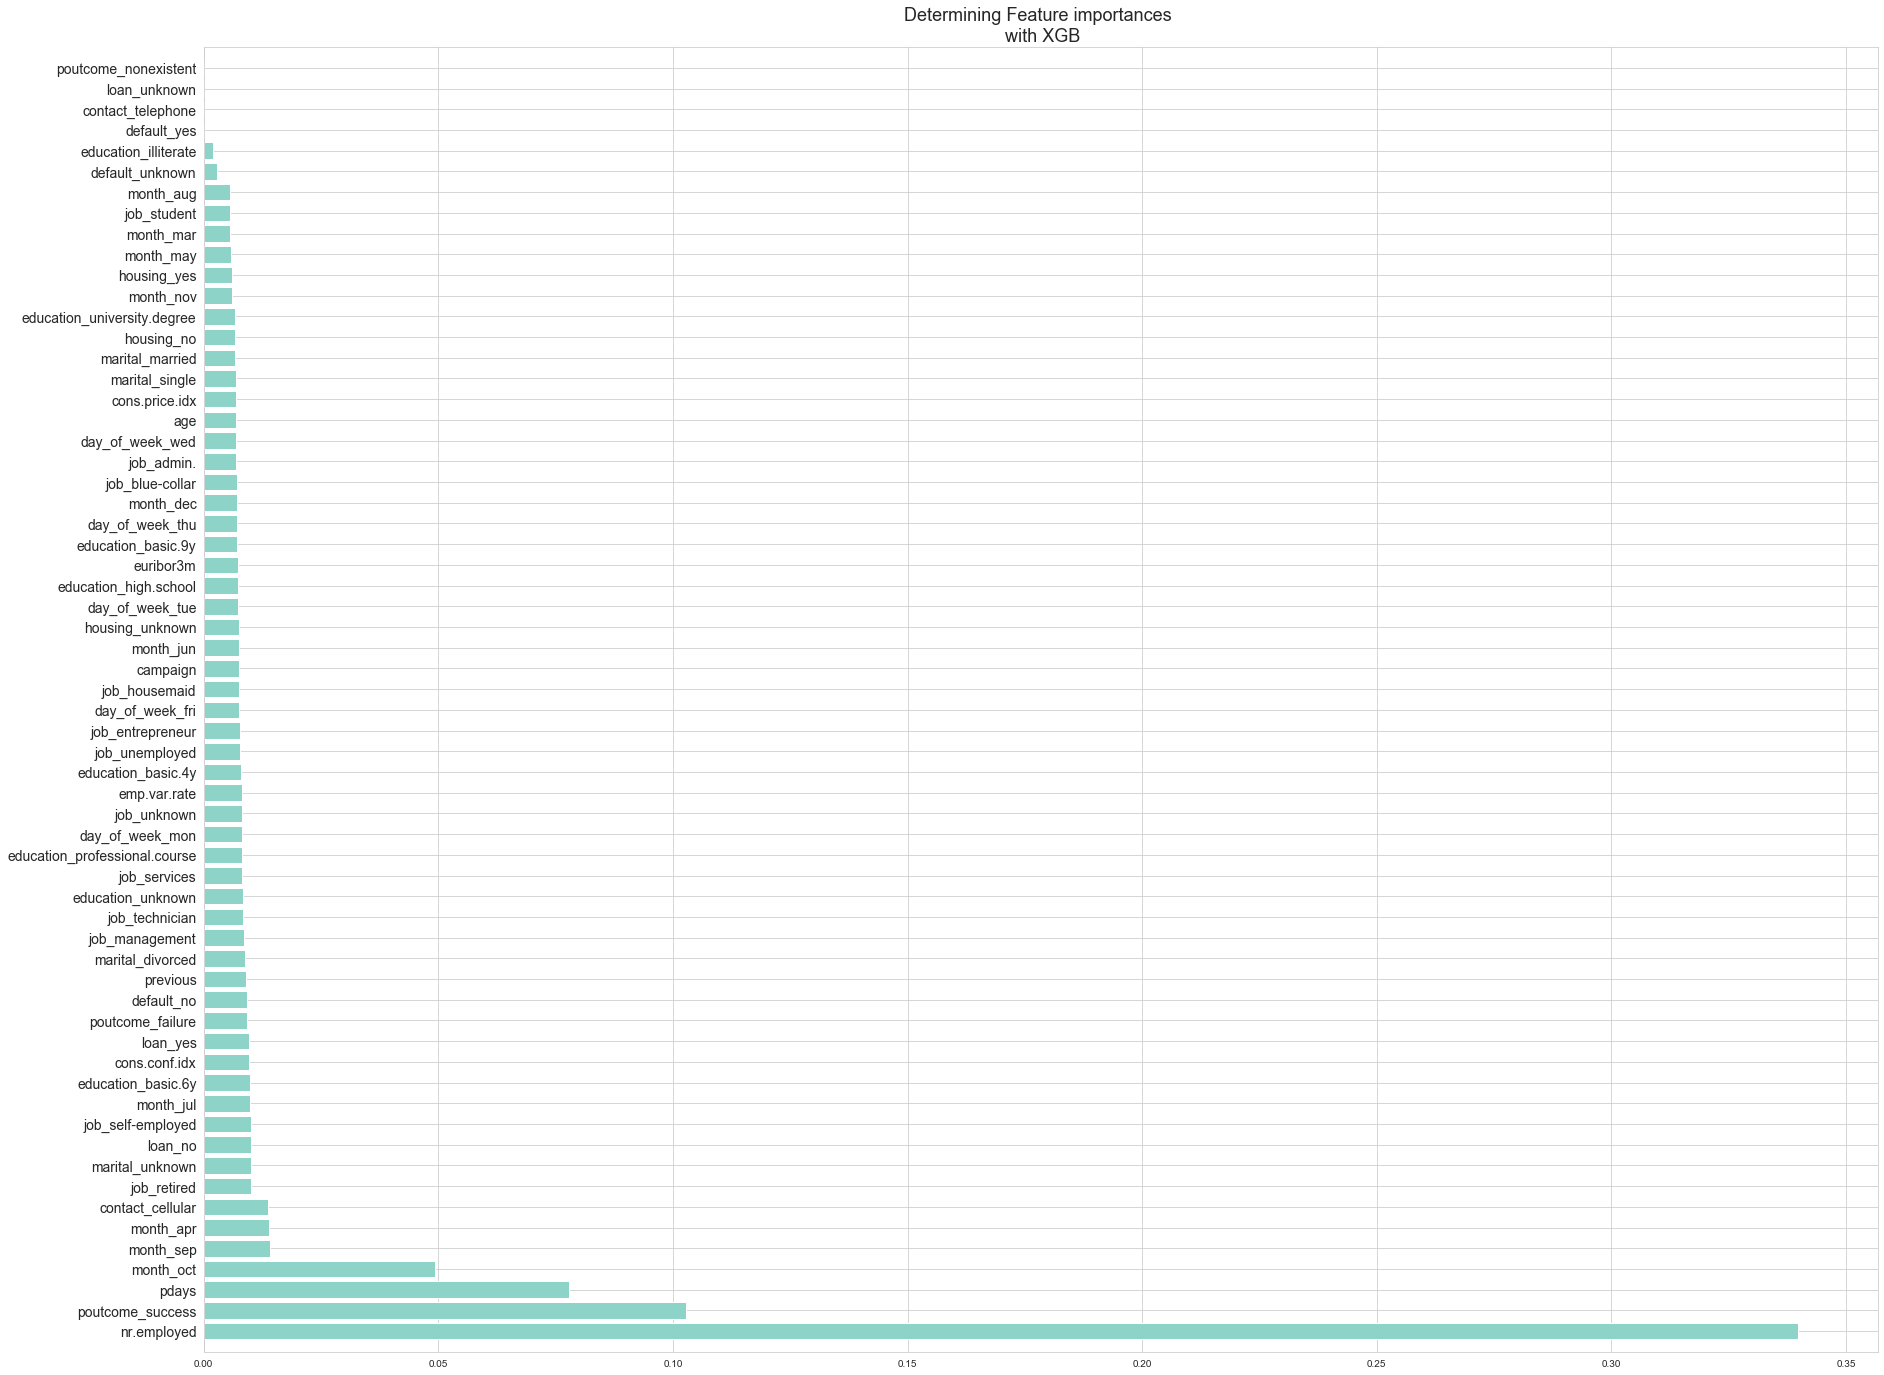

In [207]:
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(30,24))
    plt.title("Determining Feature importances \n with XGB", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
#ax = plot_importance(gs_xb_best)
feature_importance_graph(indices, importances, feature_names)
plt.show()

The performance isn't that great even after some tuning so I'll try to resample and ensure the data is not as imbalanced.
Undersample the major class to reduce computing time and not to heavily oversmaple the minor which can introduce bias.
But still be oversampling the minor to have reasonable representation of the minor class

# Sampling to fix data inbalance

In [23]:

print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (32950, 62)
Number transactions y_train dataset:  (32950,)
Number transactions X_test dataset:  (8238, 62)
Number transactions y_test dataset:  (8238,)


In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

sm = SMOTE(sampling_strategy=0.3, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 3720
Before OverSampling, counts of label '0': 29230 

After OverSampling, the shape of train_X: (37999, 62)
After OverSampling, the shape of train_y: (37999,) 

After OverSampling, counts of label '1': 8769
After OverSampling, counts of label '0': 29230


# Logistic Regression

In [61]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train_res,y_train_res)
lrpred = lr.predict(X_test)

/Users/minz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
print('Report:\n',classification_report(y_test, lrpred))
print("F1 Score:",f1_score(y_test, lrpred))
print('F2 score:',fbeta_score(y_test, lrpred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, lrpred))
print('confusion Matrix:\n',confusion_matrix(y_test, lrpred))
print("Acurracy :::>",accuracy_score(y_test, lrpred))

Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7318
           1       0.50      0.44      0.47       920

    accuracy                           0.89      8238
   macro avg       0.72      0.69      0.70      8238
weighted avg       0.88      0.89      0.89      8238

F1 Score: 0.46882217090069284
F2 score: 0.45191451469278715
AUC score: 0.6929123542901956
confusion Matrix:
 [[6912  406]
 [ 514  406]]
Acurracy :::> 0.8883224083515416


* The model shows instant boost after imbalanced data resampling (recall from 22% to 44%) 
* Keeping accuracy on the same level.
* F2 boosted to 44% from 25%

In [63]:
lr2 = LogisticRegression(max_iter=500, random_state=101,multi_class='ovr',solver='liblinear',class_weight='balanced',C=0.2)
lr2.fit(X_train_res,y_train_res)
lrpred2 = lr2.predict(X_test)

In [64]:
print('Report:\n',classification_report(y_test, lrpred2))
print("F1 Score:",f1_score(y_test, lrpred2))
print('F2 score:',fbeta_score(y_test, lrpred2, beta=2.0))
print('AUC score:',roc_auc_score(y_test, lrpred2))
print('confusion Matrix:\n',confusion_matrix(y_test, lrpred2))
print("Acurracy :::>",accuracy_score(y_test, lrpred2))


Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      7318
           1       0.34      0.63      0.44       920

    accuracy                           0.82      8238
   macro avg       0.64      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238

F1 Score: 0.43978658536585363
F2 score: 0.535846953937593
AUC score: 0.7365850434307307
confusion Matrix:
 [[6191 1127]
 [ 343  577]]
Acurracy :::> 0.8215586307356154


* After some more parameter tuning, The model shows meaningful improvement of recall 63% from 44%
* F2 boosted to 54% from 44%
* Overall accuracy was tradeoff and dropped

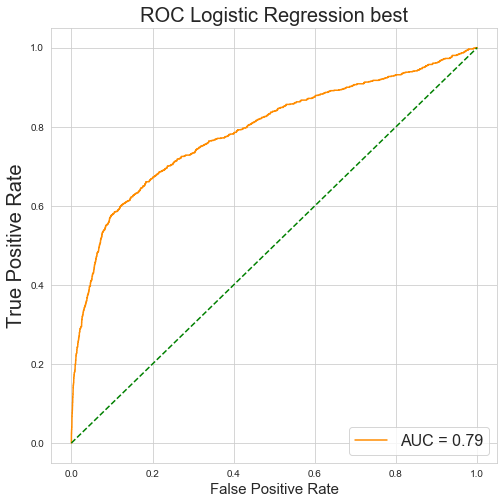

In [83]:
fig, ax = plt.subplots(figsize = (8,8))
probs = lr2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'darkorange', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'g--')
ax.set_title('ROC Logistic Regression best',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [66]:
# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, preds)
no_skill = len(y_test[y_test==1]) / len(y_test)

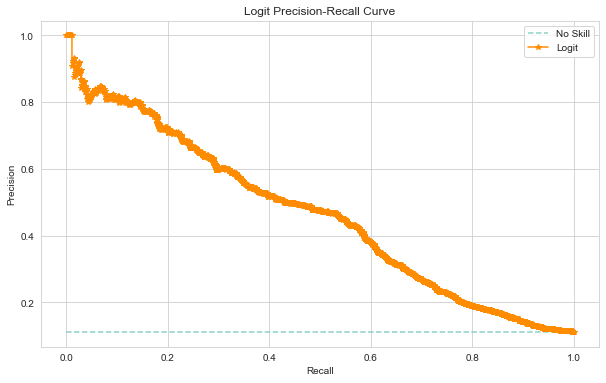

In [67]:
plt.figure(figsize=(10,6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, preds)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='*', label='Logit', color = 'darkorange')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logit Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

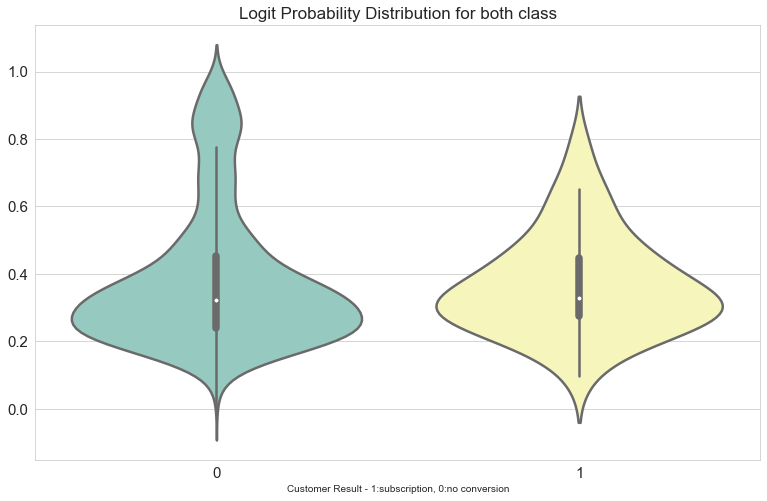

In [73]:
plt.figure(figsize=(13,8))
sns.set_style("whitegrid")

sns.violinplot(x=y_test, y=preds, inner="box", linewidth=2.5)
#plt.axhline(0.955, linestyle = '--', color = 'lightpink')
#plt.axhline(0.84, linestyle = '--', color = 'lightpink')
#plt.axhline(0.58, linestyle = '--', color = 'lightpink')
plt.title("Logit Probability Distribution for both class", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

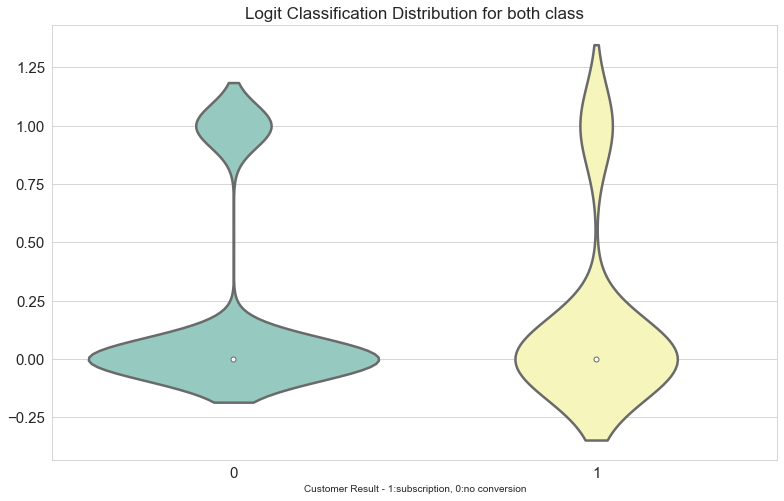

In [75]:
plt.figure(figsize=(13,8))
sns.set_style("whitegrid")

sns.violinplot(x=y_test, y=lrpred2, inner="box", linewidth=2.5)
#plt.axhline(0.955, linestyle = '--', color = 'lightpink')
#plt.axhline(0.84, linestyle = '--', color = 'lightpink')
#plt.axhline(0.58, linestyle = '--', color = 'lightpink')
plt.title("Logit Classification Distribution for both class", fontsize=17)
plt.xlabel('Customer Result - 1:subscription, 0:no conversion')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

[[ 577  343]
 [1127 6191]]


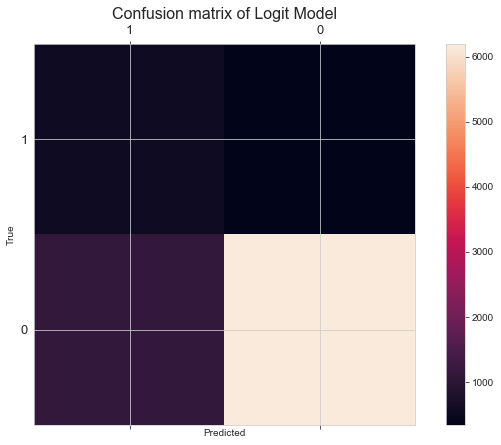

In [76]:
labels = [1,0]
cm = confusion_matrix(y_test, lrpred2, labels)
print(cm)

fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of Logit Model', fontsize=16)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=13)
ax.set_yticklabels([''] + labels, fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression Grid Search to see if the model can improve

In [30]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   18.0s finished
/Users/minz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [31]:
clf.best_params_

{'C': 1.0}

In [33]:
lr1 = LogisticRegression(C=1,penalty='l2', verbose=5, solver="lbfgs",max_iter=200)
lr1.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [34]:
lr1pred = lr1.predict(X_test)

print('Report:\n',classification_report(y_test, lr1pred))
print("F1 Score:",f1_score(y_test, lr1pred))
print('F2 score:',fbeta_score(y_test, lr1pred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, lr1pred))
print('confusion Matrix:\n',confusion_matrix(y_test, lr1pred))
print("Acurracy :::>",accuracy_score(y_test, lr1pred))

Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7318
           1       0.50      0.44      0.47       920

    accuracy                           0.89      8238
   macro avg       0.72      0.69      0.70      8238
weighted avg       0.88      0.89      0.89      8238

F1 Score: 0.46882217090069284
F2 score: 0.45191451469278715
AUC score: 0.6929123542901956
confusion Matrix:
 [[6912  406]
 [ 514  406]]
Acurracy :::> 0.8883224083515416


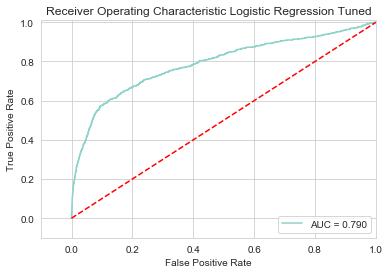

In [35]:
y_pred_sample_score = lr1.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic Logistic Regression Tuned')
plt.plot(fpr, tpr, label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

with same ROC AUC and lower recall, the model did not improve. Accuracy is't a critical metric here 

# Tree Based Models

Going with Tree-Based model as it will take care of feature selection.
Current model suggests that there's a lot of noise and probably because it really can't tell which column/info is important to predict, so I'll let the model take care of it.
They often require more data than linear algorithms and are slower to train. Decision trees do not require normalization of their inputs; and since XGBoost/Randomforest is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either.

In [78]:
sel = SelectFromModel(ExtraTreesClassifier(n_estimators=10, random_state=1), 
                      threshold='mean')
clf = RandomForestClassifier(n_estimators=500, random_state=1)

model = Pipeline([('sel', sel), ('clf', clf)])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(model, params, scoring='recall')
gs.fit(X_train_res, y_train_res)

gs.score(X_test, y_test)

/Users/minz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.31521739130434784

In [79]:
gspred = gs.predict(X_test)

print('Report:\n',classification_report(y_test, gspred))
print("F1 Score:",f1_score(y_test, gspred))
print('F2 score:',fbeta_score(y_test, gspred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, gspred))
print('confusion Matrix:\n',confusion_matrix(y_test, gspred))
print("Acurracy :::>",accuracy_score(y_test, gspred))

Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7318
           1       0.49      0.32      0.38       920

    accuracy                           0.89      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238

F1 Score: 0.38233355306526035
F2 score: 0.3390226794482114
AUC score: 0.6366330192378531
confusion Matrix:
 [[7011  307]
 [ 630  290]]
Acurracy :::> 0.8862588006797767


# Random Forest

### RF basic model

In [84]:
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 1)
rfc.fit(X_train_res, y_train_res)
rfcpred = rfc.predict(X_test)

In [85]:
print('Report:\n',classification_report(y_test, rfcpred))
print("F1 Score:",f1_score(y_test, rfcpred))
print('F2 score:',fbeta_score(y_test, rfcpred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, rfcpred))
print('confusion Matrix:\n',confusion_matrix(y_test, rfcpred))
print("Acurracy :::>",accuracy_score(y_test, rfcpred))

Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7318
           1       0.52      0.32      0.39       920

    accuracy                           0.89      8238
   macro avg       0.72      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238

F1 Score: 0.3938172043010753
F2 score: 0.34486817325800373
AUC score: 0.64044984374443
confusion Matrix:
 [[7043  275]
 [ 627  293]]
Acurracy :::> 0.890507404709881


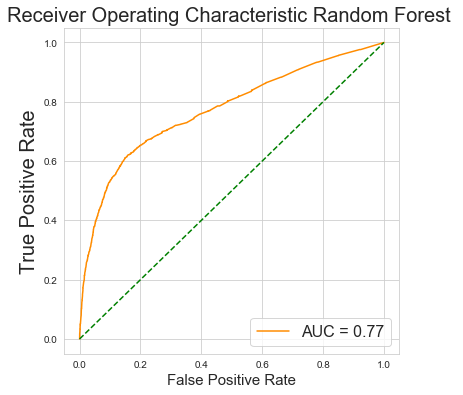

In [88]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'darkorange', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'g--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [89]:
# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, preds)
no_skill = len(y_test[y_test==1]) / len(y_test)

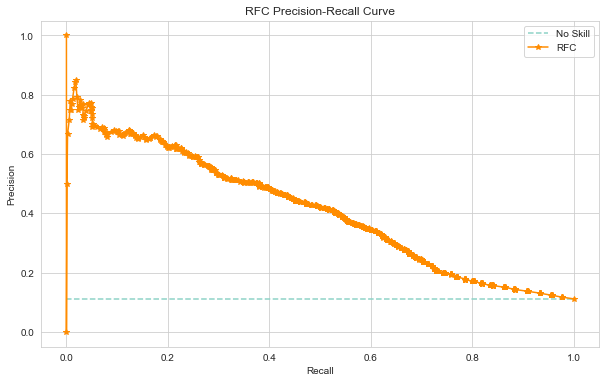

In [90]:
plt.figure(figsize=(10,6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, preds)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='*', label='RFC', color = 'darkorange')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RFC Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

Feature ranking:
1. feature 7 (0.117605)
2. feature 0 (0.101548)
3. feature 1 (0.071117)
4. feature 8 (0.065382)
5. feature 4 (0.038544)
6. feature 6 (0.035451)
7. feature 5 (0.025311)
8. feature 36 (0.025161)
9. feature 38 (0.024359)
10. feature 2 (0.022399)
11. feature 22 (0.022235)
12. feature 56 (0.021034)
13. feature 61 (0.020562)
14. feature 55 (0.020520)
15. feature 23 (0.018832)
16. feature 31 (0.018769)
17. feature 58 (0.017295)
18. feature 54 (0.016817)
19. feature 9 (0.016792)
20. feature 57 (0.016247)
21. feature 43 (0.015509)
22. feature 28 (0.015201)
23. feature 42 (0.015171)
24. feature 3 (0.014067)
25. feature 34 (0.012426)
26. feature 10 (0.012029)
27. feature 41 (0.011686)
28. feature 39 (0.011579)
29. feature 18 (0.011369)
30. feature 60 (0.011349)
31. feature 33 (0.011024)
32. feature 50 (0.010545)
33. feature 27 (0.010496)
34. feature 30 (0.010206)
35. feature 21 (0.009676)
36. feature 59 (0.008051)
37. feature 16 (0.007398)
38. feature 25 (0.007207)
39. feature 13

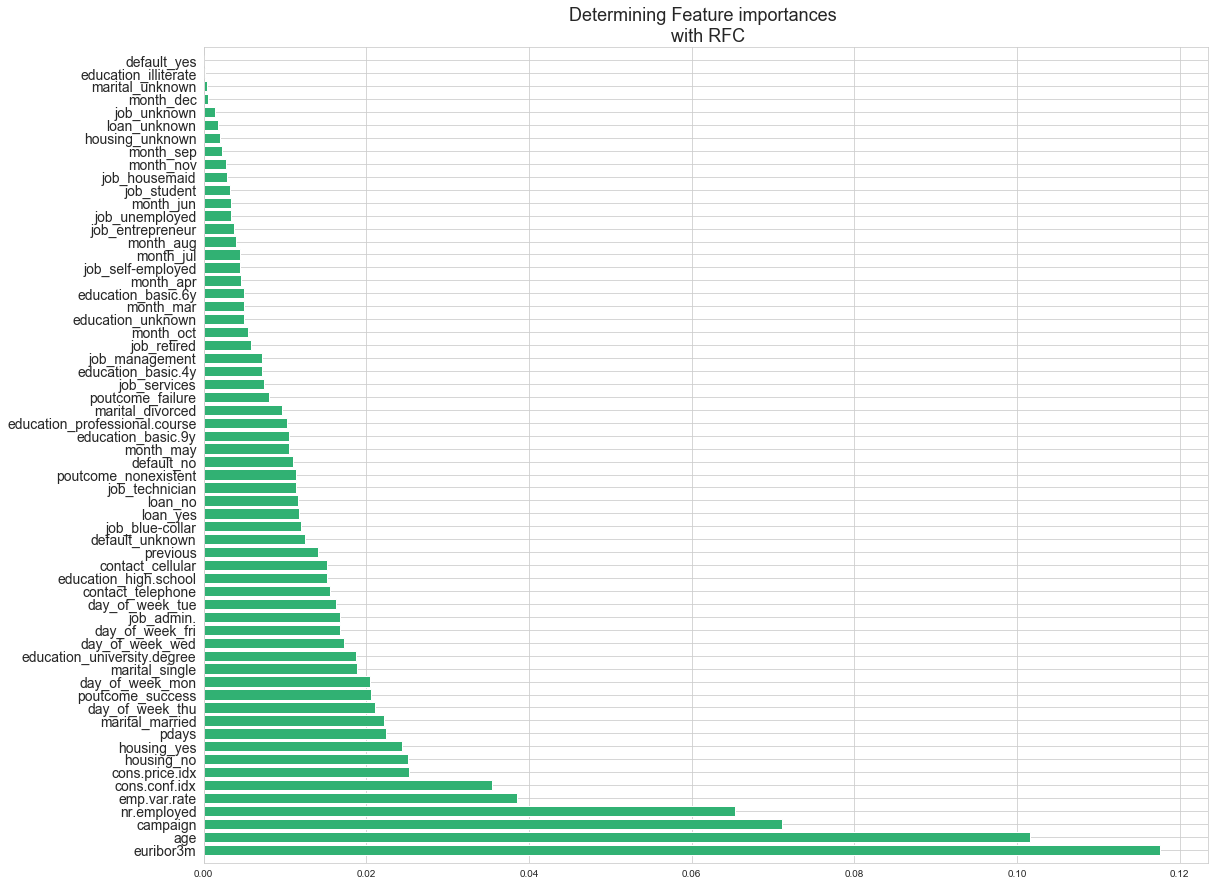

In [91]:
importances = rfc.fit(X_train_res,y_train_res).feature_importances_
feature_names = data.drop('y_binary', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_res.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(18,15))
    plt.title("Determining Feature importances \n with RFC", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    #plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    #plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# Gridsearch for both RFC and LR

In [37]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring='recall', verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.4min finished


In [38]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print('Model recall accuracy is',best_clf.score(X_test, y_test))

Model recall accuracy is 0.30543478260869567


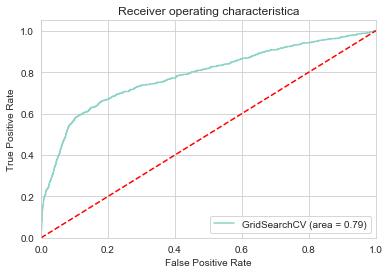

In [43]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristica')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
preds = best_clf.predict(X_test)

In [47]:
print('Report:\n',classification_report(y_test, preds))
print("F1 Score:",f1_score(y_test, preds))
print('F2 score:',fbeta_score(y_test, preds, beta=2.0))
print('AUC score:',roc_auc_score(y_test, preds))
print('confusion Matrix:\n',confusion_matrix(y_test, preds))
print("Acurracy :::>",accuracy_score(y_test, preds))

Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7318
           1       0.53      0.31      0.39       920

    accuracy                           0.89      8238
   macro avg       0.72      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238

F1 Score: 0.38651994497936726
F2 score: 0.3334124347413384
AUC score: 0.6354312475492235
confusion Matrix:
 [[7065  253]
 [ 639  281]]
Acurracy :::> 0.8917212915756252


The Model did not improve than current best (logistics)

# XG Boost + Grid Search

In [157]:
xb= xgb.XGBClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[200,400], 'max_depth':[50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='recall',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=X_train_res, y=y_train_res, cv=5,scoring='recall', n_jobs=-1)

# fit, and fit with best estimator
gs_xb.fit(X_train_res, y_train_res)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(X_train_res, y_train_res)

print('Train Recall:   {0:.1f}%'.format(gs_xb.score(X_train_res, y_train_res)*100))
print('Test Recall:    {0:.1f}%'.format(gs_xb.score(X_test, y_test)*100))


Train Recall:   98.5%
Test Recall:    31.6%


In [158]:
XGBpred = gs_xb_best.predict(X_test)

In [159]:
print('Report:\n',classification_report(y_test, XGBpred))
print("F1 Score:",f1_score(y_test, XGBpred))
print('F2 score:',fbeta_score(y_test, XGBpred, beta=2.0))
print('AUC score:',roc_auc_score(y_test, XGBpred))
print('confusion Matrix:\n',confusion_matrix(y_test, XGBpred))
print("Acurracy :::>",accuracy_score(y_test, XGBpred))

Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7318
           1       0.49      0.32      0.38       920

    accuracy                           0.89      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238

F1 Score: 0.3844121532364597
F2 score: 0.34043051006083297
AUC score: 0.6374497962142187
confusion Matrix:
 [[7015  303]
 [ 629  291]]
Acurracy :::> 0.8868657441126487


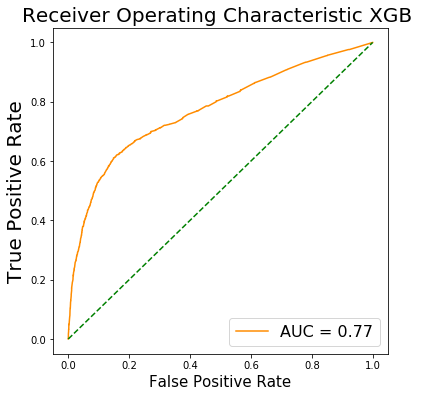

In [168]:
fig, ax = plt.subplots(figsize = (6,6))
xgbprobs = gs_xb_best.predict_proba(X_test)
xgbpreds = probs[:,1]
xgbfpr, xgbtpr, xgbthreshold = metrics.roc_curve(y_test, xgbpreds)
roc_aucxgb = metrics.auc(xgbfpr, xgbtpr)

ax.plot(xgbfpr, xgbtpr, 'darkorange', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'g--')
ax.set_title('Receiver Operating Characteristic XGB ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

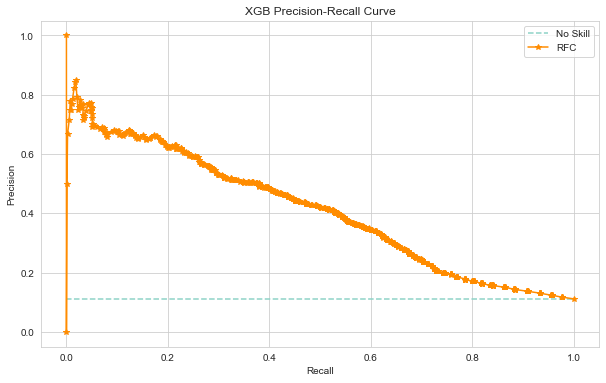

In [208]:
# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, xgbpreds)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,6))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, xgbpreds)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='*', label='XGB', color = 'darkorange')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGB Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

The Model is not performing better than the best LOGIT model

# Other improvement can be made

1. Feature selection & engineering
 - We observed some multicolinearity
 - Some variables have little or no feature importance for models
 - Some categorical features can be engineered to reduce model running time & provide more information
 
 
2. only a few algorithms are tried, however, there are more popular algorithms with strong performance
 - e.g. SVM, GBM, Linear, KNN etc
 
 
3. Model hyperparameter tuning

# Other models tried on pre-resample dataset: RFC, XGB

A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

In [67]:
sel2 = SelectFromModel(ExtraTreesClassifier(n_estimators=20, random_state=1), 
                      threshold='mean')
clf2 = RandomForestClassifier(n_estimators=500, random_state=1)

model = Pipeline([('sel', sel2), ('clf', clf2)])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(model, params)
gs.fit(X_train, y_train)

gs.score(X_test, y_test)

/Users/minz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8821315853362467

In [113]:
xgbo =XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.78,
                           colsample_bytree=1, max_depth=7)
xgbo.fit(X_train,y_train)
prediction = xgbo.predict(X_test)


In [109]:
accuracies = {}
recalls = {}
f2scores= {}
f1scores={}
ROCAUCscores={}

acc = accuracy_score(y_test, prediction)*100
print("Xgboost Classifier accuracy:",acc)
accuracies['Xgboost Classifier']=acc

recall = recall_score(y_test, prediction)*100
print("Xgboost Classifier recall:",recall)
recalls['Xgboost Classifier']=recall

f1=f1_score(y_test,prediction)*100
print("F1 Score: ",f1)
f1scores['Xgboost Classifier']=f1

f2 = fbeta_score(y_test, prediction, beta=2.0)*100
print('f2 score: ',f2)
f2scores['Xgboost Classifier']=f2

ROCAUC = roc_auc_score(y_test, prediction)*100
print('ROC_AUC score: ',ROCAUC)
ROCAUCscores['Xgboost Classifier']=ROCAUC

Xgboost Classifier accuracy: 89.91260014566642
Xgboost Classifier recall: 28.072033898305083
F1 Score:  38.94195444526083
f2 score:  31.60028619127116
ROC_AUC score:  62.99406465959948
